<a href="https://colab.research.google.com/github/Kashialy/Eda-project-new/blob/main/ML_project_2%2Ckashif.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Step 1 : import library
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn import linear_model
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [6]:
df=pd.read_csv("/content/drive/MyDrive/Classroom/DS Bootcamp Cohort 11/Social_Network_Ads.csv")
print(df)

      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]


In [7]:
df.drop(['User ID'],axis=1,inplace=True)


In [ ]:
print(df.columns)

Index(['Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')


In [ ]:
one_hot_encoded_data = pd.get_dummies(df, columns = ['Gender'])
print(one_hot_encoded_data)

     Age  EstimatedSalary  Purchased  Gender_Female  Gender_Male
0     19            19000          0          False         True
1     35            20000          0          False         True
2     26            43000          0           True        False
3     27            57000          0           True        False
4     19            76000          0          False         True
..   ...              ...        ...            ...          ...
395   46            41000          1           True        False
396   51            23000          1          False         True
397   50            20000          1           True        False
398   36            33000          0          False         True
399   49            36000          1           True        False

[400 rows x 5 columns]


In [9]:
one_hot_encoded_data = pd.get_dummies(df, columns = ['Purchased'])
print(one_hot_encoded_data)

      User ID  Gender  Age  EstimatedSalary  Purchased_0  Purchased_1
0    15624510    Male   19            19000         True        False
1    15810944    Male   35            20000         True        False
2    15668575  Female   26            43000         True        False
3    15603246  Female   27            57000         True        False
4    15804002    Male   19            76000         True        False
..        ...     ...  ...              ...          ...          ...
395  15691863  Female   46            41000        False         True
396  15706071    Male   51            23000        False         True
397  15654296  Female   50            20000        False         True
398  15755018    Male   36            33000         True        False
399  15594041  Female   49            36000        False         True

[400 rows x 6 columns]


In [11]:
combine_data = pd.concat([one_hot_encoded_data, pd.DataFrame( columns=['Purchased'])], axis=1)
# Print the head of the combined data to verify
print(combine_data.head())

    User ID  Gender  Age  EstimatedSalary  Purchased_0  Purchased_1 Purchased
0  15624510    Male   19            19000         True        False       NaN
1  15810944    Male   35            20000         True        False       NaN
2  15668575  Female   26            43000         True        False       NaN
3  15603246  Female   27            57000         True        False       NaN
4  15804002    Male   19            76000         True        False       NaN


In [13]:
combined_data = pd.concat([one_hot_encoded_data, pd.DataFrame( columns=['Gender'])], axis=1)
# Print the head of the combined data to verify
print(combined_data.head())

    User ID  Gender  Age  EstimatedSalary  Purchased_0  Purchased_1 Gender
0  15624510    Male   19            19000         True        False    NaN
1  15810944    Male   35            20000         True        False    NaN
2  15668575  Female   26            43000         True        False    NaN
3  15603246  Female   27            57000         True        False    NaN
4  15804002    Male   19            76000         True        False    NaN


In [10]:
X=df[['Age','EstimatedSalary']]
Y=df['Purchased']

In [11]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [12]:
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.25,random_state=24)

In [23]:
len(X_train)

300

In [57]:
len(Y_train)

300

In [22]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(X_train,Y_train)

GaussianNB()

In [25]:
# 🔍 Step 6: Predict on the test data
y_pred = model.predict(X_test)

In [30]:
#import confusion matix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)

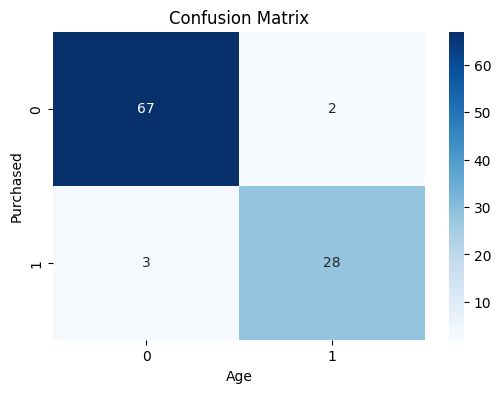

In [68]:
# Plot the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
plt.figure(figsize=(6, 4))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Age')
plt.ylabel('Purchased')
plt.title('Confusion Matrix')
plt.show()

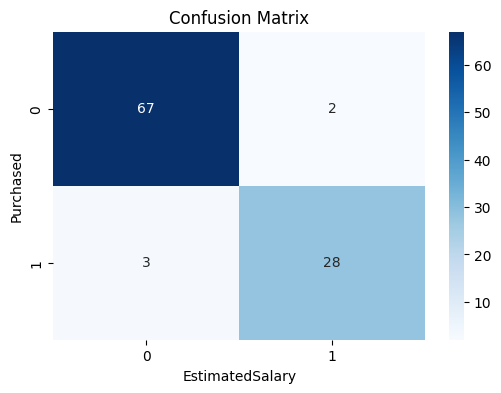

In [32]:
# Plot the confusion matrix
import seaborn as sns
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('EstimatedSalary')
plt.ylabel('Purchased')
plt.title('Confusion Matrix')
plt.show()

In [34]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=3)

In [35]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,Y_train)

KNeighborsClassifier()

In [36]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=7)
model.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=7)

In [42]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [14]:
#import decisiontree classifier
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=42)
clf.fit(X_train,Y_train)
y_pred=clf.predict(X_train)
print(y_pred)

[0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1
 1 0 0 1 0 0 0 0 1 0 0 1 1 1 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0
 0 0 0 1 1 1 0 0 1 0 0 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0
 1 0 1 1 1 0 1 0 0 1 0 0 0 1 0 0 1 1 0 1 0 1 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1
 0 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 1 0 1
 0 1 1 1 1 1 0 0 0 0 0 1 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1
 1 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1
 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 1 1 0 1 1 0 1 0 1 0 1 0
 0 1 0 0]


In [23]:
# 6. Predictions and evaluation
from sklearn.metrics import accuracy_score, classification_report, recall_score, precision_score, f1_score
gnb=GaussianNB()
gnb.fit(X_train,Y_train)
y_pred_gnb=gnb.predict(X_test)

print("Accuracy:", accuracy_score(Y_test, y_pred_gnb))
print("Recall:", recall_score(Y_test, y_pred_gnb))
print("Precision:", precision_score(Y_test, y_pred_gnb))
print("F1 Score:", f1_score(Y_test, y_pred_gnb))
print("\nClassification Report:\n", classification_report(Y_test, y_pred_gnb))

Accuracy: 0.95
Recall: 0.9032258064516129
Precision: 0.9333333333333333
F1 Score: 0.9180327868852459

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96        69
           1       0.93      0.90      0.92        31

    accuracy                           0.95       100
   macro avg       0.95      0.94      0.94       100
weighted avg       0.95      0.95      0.95       100



In [55]:
# 6. Predictions and evaluation
from sklearn.metrics import accuracy_score, classification_report, recall_score, precision_score, f1_score
KNN=KNeighborsClassifier()
KNN.fit(X_train,Y_train)
y_pred_KNN=KNN.predict(X_test)

print("Accuracy:", accuracy_score(Y_test, y_pred_KNN))
print("Recall:", recall_score(Y_test, y_pred_KNN))
print("Precision:", precision_score(Y_test, y_pred_KNN))
print("F1 Score:", f1_score(Y_test, y_pred_KNN))
print("\nClassification Report:\n", classification_report(Y_test, y_pred_KNN))

Accuracy: 0.96
Recall: 0.9354838709677419
Precision: 0.9354838709677419
F1 Score: 0.9354838709677419

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        69
           1       0.94      0.94      0.94        31

    accuracy                           0.96       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.96      0.96      0.96       100



In [56]:
# 6. Predictions and evaluation
from sklearn.metrics import accuracy_score, classification_report, recall_score, precision_score, f1_score
DT=DecisionTreeClassifier()
DT.fit(X_train,Y_train)
y_pred_DT=DT.predict(X_test)

print("Accuracy:", accuracy_score(Y_test, y_pred_DT))
print("Recall:", recall_score(Y_test, y_pred_DT))
print("Precision:", precision_score(Y_test, y_pred_DT))
print("F1 Score:", f1_score(Y_test, y_pred_DT))
print("\nClassification Report:\n", classification_report(Y_test, y_pred_DT))

Accuracy: 0.85
Recall: 0.6451612903225806
Precision: 0.8333333333333334
F1 Score: 0.7272727272727273

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.94      0.90        69
           1       0.83      0.65      0.73        31

    accuracy                           0.85       100
   macro avg       0.84      0.79      0.81       100
weighted avg       0.85      0.85      0.84       100

